In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

In [2]:
data = pd.read_csv('D:/IIT Delhi/Dataset_july/data_files/data_1.csv')

In [3]:
data

,Time,Potential,Current,SOC
0,0.4,3.97,0.400,0.629932
1,1.0,3.97,1.250,0.629554
2,2.0,3.98,1.250,0.629679
3,3.0,3.98,1.250,0.629821
4,4.0,3.98,1.250,0.629946
...,...,...,...,...
1048567,1048567.0,4.20,0.828,0.891719
1048568,1048568.0,4.20,0.827,0.891719
1048569,1048569.0,4.20,0.826,0.891719
1048570,1048570.0,4.20,0.826,0.891719


In [4]:
data.describe()

,Time,Potential,Current,SOC
count,1.048572e+06,1.048572e+06,1.048572e+06,1.048572e+06
mean,5.242855e+05,3.814223e+00,1.833261e-03,5.698376e-01
std,3.026968e+05,3.940242e-01,1.285114e+00,3.532780e-01
min,4.000000e-01,2.750000e+00,-2.500000e+00,0.000000e+00
25%,2.621428e+05,3.400000e+00,0.000000e+00,2.197449e-01
50%,5.242855e+05,3.890000e+00,7.400000e-02,6.417189e-01
75%,7.864282e+05,4.190000e+00,1.250000e+00,9.214426e-01
max,1.048571e+06,4.200000e+00,1.270000e+00,9.999987e-01


In [5]:
data.isnull().sum()

Time         0
Potential    0
Current      0
SOC          0
dtype: int64

# Data Modeling

In [6]:
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

numericals = ['Time','Potential','Current'] # Not Normalizing the Y(target Variable) - which is SOC
data[numericals] = scaler.fit_transform(data[numericals])

In [7]:
data.head()


,Time,Potential,Current,SOC
0,0.000000e+00,0.841379,0.769231,0.629932
1,5.722075e-07,0.841379,0.994695,0.629554
2,1.525887e-06,0.848276,0.994695,0.629679
3,2.479566e-06,0.848276,0.994695,0.629821
4,3.433245e-06,0.848276,0.994695,0.629946


In [8]:
Y = data.pop('SOC')
X = data

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.2)

In [10]:
X_train.shape , X_test.shape , Y_train.shape , Y_test.shape

((838857, 3), (209715, 3), (838857,), (209715,))

In [11]:
X_train.head()

,Time,Potential,Current
681274,0.649716,0.365517,0.663130
318059,0.303326,0.317241,0.663130
691293,0.659271,1.000000,0.681618
671244,0.640151,1.000000,0.698143
410237,0.391234,0.496552,0.000000


In [12]:
def plot_his(history):
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title('model loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Test'], loc='upper left')
  plt.show()

In [13]:
from tensorflow.keras.callbacks import EarlyStopping
callback = EarlyStopping(
    monitor = 'val_loss' ,
    min_delta = 0.00001,
    patience = 15,
    verbose = 1,
    mode = 'auto',
    baseline = None,
    restore_best_weights = False
)

# AIC

In [14]:
import tensorflow as tf
from scipy.stats import norm

# Train your model using TensorFlow
def AIC_value(model,Y_pred,Y_test):

    Y_test = np.asarray(Y_test).astype('float32').reshape((-1,1))
    Y_pred_1 = np.asarray(Y_pred).astype('float32').reshape((-1,1))


    # Calculate the negative log-likelihood of the model's parameters based on the training data
    nll = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(labels=Y_test, logits=Y_pred_1))

    # Calculate the number of parameters in the model
    num_params = model.count_params()

    # Calculate the AIC value for the model
    aic = 2 * num_params - 2 * nll

    # Print the AIC value
    print("AIC: ", aic.numpy())

In [15]:
# pip install tensorflow_addons

In [16]:
import tensorflow_addons as tfa

C:\Users\Bhawit Balodi\AppData\Roaming\Python\Python310\site-packages\tensorflow_addons\utils\tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


In [19]:
%%time
import tensorflow as tf

tf.random.set_seed(42)

model_1 = tf.keras.Sequential([tf.keras.layers.Dense(150,activation = 'linear'),
                               tf.keras.layers.Dropout(0.2),
                               tf.keras.layers.Dense(100),
                               tf.keras.layers.Dense(50),
                               tf.keras.layers.Dense(1)])

model_1.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.legacy.Adam(learning_rate=0.001,decay=0.001),
                metrics=[tf.keras.metrics.RootMeanSquaredError(name='rmse'),
                         tfa.metrics.RSquare(name='r2'),'mae','mse','mape'])

history_1 = model_1.fit(X_train,Y_train, epochs= 100,batch_size=32,validation_data=(X_test,Y_test), callbacks = callback)

Epoch 1/100
26215/26215 [==============================] - 57s 2ms/step - loss: 0.0414 - rmse: 0.0593 - r2: 0.9718 - mae: 0.0414 - mse: 0.0035 - mape: 84783.7500 - val_loss: 0.0343 - val_rmse: 0.0521 - val_r2: 0.9782 - val_mae: 0.0343 - val_mse: 0.0027 - val_mape: 28696.4805
Epoch 2/100
26215/26215 [==============================] - 60s 2ms/step - loss: 0.0384 - rmse: 0.0566 - r2: 0.9743 - mae: 0.0384 - mse: 0.0032 - mape: 87462.1328 - val_loss: 0.0340 - val_rmse: 0.0525 - val_r2: 0.9779 - val_mae: 0.0340 - val_mse: 0.0028 - val_mape: 28875.6973
Epoch 3/100
26215/26215 [==============================] - 62s 2ms/step - loss: 0.0380 - rmse: 0.0566 - r2: 0.9744 - mae: 0.0380 - mse: 0.0032 - mape: 86739.7969 - val_loss: 0.0341 - val_rmse: 0.0528 - val_r2: 0.9776 - val_mae: 0.0341 - val_mse: 0.0028 - val_mape: 32073.8691
Epoch 4/100
26215/26215 [==============================] - 50s 2ms/step - loss: 0.0378 - rmse: 0.0564 - r2: 0.9745 - mae: 0.0378 - mse: 0.0032 - mape: 84767.1875 - val_loss

Epoch 31/100
26215/26215 [==============================] - 46s 2ms/step - loss: 0.0371 - rmse: 0.0561 - r2: 0.9748 - mae: 0.0371 - mse: 0.0031 - mape: 83867.5469 - val_loss: 0.0341 - val_rmse: 0.0518 - val_r2: 0.9784 - val_mae: 0.0341 - val_mse: 0.0027 - val_mape: 27688.7383
Epoch 32/100
26215/26215 [==============================] - 47s 2ms/step - loss: 0.0371 - rmse: 0.0560 - r2: 0.9749 - mae: 0.0371 - mse: 0.0031 - mape: 81838.7422 - val_loss: 0.0340 - val_rmse: 0.0522 - val_r2: 0.9781 - val_mae: 0.0340 - val_mse: 0.0027 - val_mape: 28643.4766
Epoch 33/100
26215/26215 [==============================] - 46s 2ms/step - loss: 0.0371 - rmse: 0.0560 - r2: 0.9749 - mae: 0.0371 - mse: 0.0031 - mape: 83906.6172 - val_loss: 0.0340 - val_rmse: 0.0522 - val_r2: 0.9782 - val_mae: 0.0340 - val_mse: 0.0027 - val_mape: 28579.2676
Epoch 34/100
26215/26215 [==============================] - 46s 2ms/step - loss: 0.0372 - rmse: 0.0561 - r2: 0.9748 - mae: 0.0372 - mse: 0.0031 - mape: 82908.9141 - val_

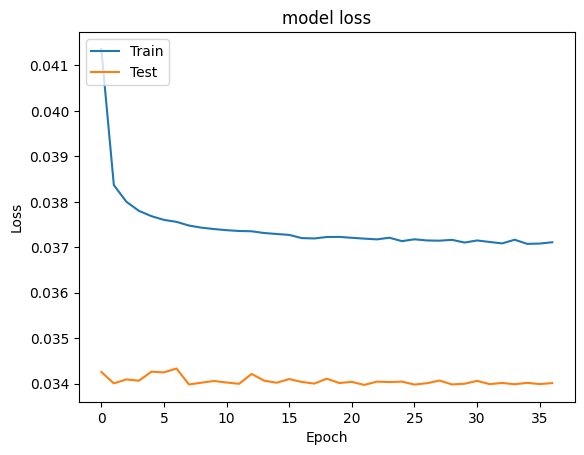

In [20]:
plot_his(history_1)

In [21]:
model_1.evaluate(X_test,Y_test)

6554/6554 [==============================] - 8s 1ms/step - loss: 0.0340 - rmse: 0.0521 - r2: 0.9782 - mae: 0.0340 - mse: 0.0027 - mape: 28323.2188


[0.03401464223861694,
 0.05205315724015236,
 0.9782336354255676,
 0.03401464223861694,
 0.0027095309924334288,
 28323.21875]

In [22]:
Y_pred_1 = model_1.predict(X_test)

6554/6554 [==============================] - 5s 708us/step


In [23]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 150)               600       
                                                                 
 dropout (Dropout)           (None, 150)               0         
                                                                 
 dense_1 (Dense)             (None, 100)               15100     
                                                                 
 dense_2 (Dense)             (None, 50)                5050      
                                                                 
 dense_3 (Dense)             (None, 1)                 51        
                                                                 
Total params: 20,801
Trainable params: 20,801
Non-trainable params: 0
_________________________________________________________________


In [24]:
AIC_value(model_1,Y_pred_1,Y_test)

AIC:  41600.824


In [25]:
model_1.save('Saved_models/model_1_SOCesti.h5')

In [19]:
%%time
tf.random.set_seed(42)

model_2 = tf.keras.Sequential([tf.keras.layers.Dense(150,activation = 'linear'),
                               tf.keras.layers.Dense(100,activation = 'relu'),
                               tf.keras.layers.Dense(50),
                               tf.keras.layers.Dense(20),
                               tf.keras.layers.Dense(1)])

model_2.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.legacy.Adam(learning_rate=0.001,decay=0.001),
                metrics=[tf.keras.metrics.RootMeanSquaredError(name='rmse'),
                         tfa.metrics.RSquare(name='r2'),'mae','mse','mape'])

history_2 = model_2.fit(X_train,Y_train, epochs= 100,batch_size=32,validation_data=(X_test,Y_test), callbacks = callback)

Epoch 1/100
26215/26215 [==============================] - 47s 2ms/step - loss: 0.0056 - rmse: 0.0113 - r2: 0.9990 - mae: 0.0056 - mse: 1.2733e-04 - mape: 9616.6494 - val_loss: 0.0038 - val_rmse: 0.0065 - val_r2: 0.9997 - val_mae: 0.0038 - val_mse: 4.2013e-05 - val_mape: 2855.8550
Epoch 2/100
26215/26215 [==============================] - 41s 2ms/step - loss: 0.0036 - rmse: 0.0061 - r2: 0.9997 - mae: 0.0036 - mse: 3.7470e-05 - mape: 3082.3311 - val_loss: 0.0034 - val_rmse: 0.0061 - val_r2: 0.9997 - val_mae: 0.0034 - val_mse: 3.6818e-05 - val_mape: 1990.5089
Epoch 3/100
26215/26215 [==============================] - 41s 2ms/step - loss: 0.0034 - rmse: 0.0059 - r2: 0.9997 - mae: 0.0034 - mse: 3.4839e-05 - mape: 2882.2893 - val_loss: 0.0033 - val_rmse: 0.0059 - val_r2: 0.9997 - val_mae: 0.0033 - val_mse: 3.4285e-05 - val_mape: 2867.9641
Epoch 4/100
26215/26215 [==============================] - 41s 2ms/step - loss: 0.0033 - rmse: 0.0058 - r2: 0.9997 - mae: 0.0033 - mse: 3.3983e-05 - mape:

Epoch 30/100
26215/26215 [==============================] - 40s 2ms/step - loss: 0.0030 - rmse: 0.0055 - r2: 0.9998 - mae: 0.0030 - mse: 2.9908e-05 - mape: 1729.7467 - val_loss: 0.0031 - val_rmse: 0.0055 - val_r2: 0.9998 - val_mae: 0.0031 - val_mse: 3.0253e-05 - val_mape: 1602.0111
Epoch 31/100
26215/26215 [==============================] - 40s 2ms/step - loss: 0.0030 - rmse: 0.0055 - r2: 0.9998 - mae: 0.0030 - mse: 2.9831e-05 - mape: 1748.8168 - val_loss: 0.0030 - val_rmse: 0.0055 - val_r2: 0.9998 - val_mae: 0.0030 - val_mse: 3.0269e-05 - val_mape: 1356.2780
Epoch 32/100
26215/26215 [==============================] - 41s 2ms/step - loss: 0.0030 - rmse: 0.0055 - r2: 0.9998 - mae: 0.0030 - mse: 2.9776e-05 - mape: 1733.2952 - val_loss: 0.0030 - val_rmse: 0.0055 - val_r2: 0.9998 - val_mae: 0.0030 - val_mse: 3.0158e-05 - val_mape: 1849.4725
Epoch 33/100
26215/26215 [==============================] - 40s 2ms/step - loss: 0.0030 - rmse: 0.0054 - r2: 0.9998 - mae: 0.0030 - mse: 2.9688e-05 - m

Epoch 59/100
26215/26215 [==============================] - 40s 2ms/step - loss: 0.0030 - rmse: 0.0054 - r2: 0.9998 - mae: 0.0030 - mse: 2.8663e-05 - mape: 1763.0673 - val_loss: 0.0030 - val_rmse: 0.0054 - val_r2: 0.9998 - val_mae: 0.0030 - val_mse: 2.9065e-05 - val_mape: 1771.5411
Epoch 60/100
26215/26215 [==============================] - 42s 2ms/step - loss: 0.0030 - rmse: 0.0054 - r2: 0.9998 - mae: 0.0030 - mse: 2.8640e-05 - mape: 1761.0625 - val_loss: 0.0030 - val_rmse: 0.0054 - val_r2: 0.9998 - val_mae: 0.0030 - val_mse: 2.9100e-05 - val_mape: 1672.1493
Epoch 61/100
26215/26215 [==============================] - 41s 2ms/step - loss: 0.0030 - rmse: 0.0053 - r2: 0.9998 - mae: 0.0030 - mse: 2.8616e-05 - mape: 1727.6700 - val_loss: 0.0030 - val_rmse: 0.0054 - val_r2: 0.9998 - val_mae: 0.0030 - val_mse: 2.8928e-05 - val_mape: 1252.9546
Epoch 62/100
26215/26215 [==============================] - 40s 2ms/step - loss: 0.0030 - rmse: 0.0053 - r2: 0.9998 - mae: 0.0030 - mse: 2.8585e-05 - m

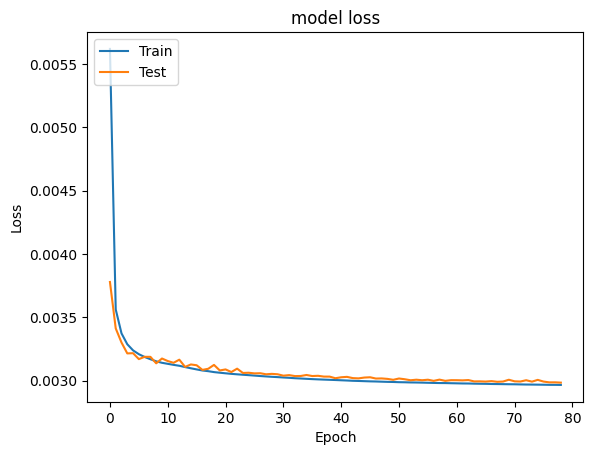

In [20]:
plot_his(history_2)

In [21]:
model_2.evaluate(X_test,Y_test)

6554/6554 [==============================] - 6s 983us/step - loss: 0.0030 - rmse: 0.0054 - r2: 0.9998 - mae: 0.0030 - mse: 2.8633e-05 - mape: 1832.6600


[0.0029851431027054787,
 0.005350963678210974,
 0.9997706413269043,
 0.0029851431027054787,
 2.8632814064621925e-05,
 1832.6600341796875]

In [22]:
Y_pred_2 = model_2.predict(X_test)

6554/6554 [==============================] - 5s 696us/step


In [23]:
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 150)               600       
                                                                 
 dense_6 (Dense)             (None, 100)               15100     
                                                                 
 dense_7 (Dense)             (None, 50)                5050      
                                                                 
 dense_8 (Dense)             (None, 20)                1020      
                                                                 
 dense_9 (Dense)             (None, 1)                 21        
                                                                 
Total params: 21,791
Trainable params: 21,791
Non-trainable params: 0
_________________________________________________________________


In [24]:
AIC_value(model_2,Y_pred_2,Y_test)

AIC:  43580.836


In [25]:
model_2.save('Saved_models/model_2_SOCesti.h5')

In [17]:
%%time
tf.random.set_seed(42)

model_3 = tf.keras.Sequential([tf.keras.layers.Dense(32,activation = 'relu'),
                               tf.keras.layers.Dense(128,activation = 'relu'),
                               tf.keras.layers.Dense(64),
                               tf.keras.layers.Dense(32),
                               tf.keras.layers.Dense(1)])

model_3.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.legacy.Adam(learning_rate=0.001,decay=0.001),
                metrics=[tf.keras.metrics.RootMeanSquaredError(name='rmse'),
                         tfa.metrics.RSquare(name='r2'),'mae','mse','mape'])

history_3 = model_3.fit(X_train,Y_train, epochs= 100,batch_size=32,validation_data=(X_test,Y_test), callbacks = callback)

Epoch 1/100
26215/26215 [==============================] - 56s 2ms/step - loss: 0.0050 - rmse: 0.0152 - r2: 0.9982 - mae: 0.0050 - mse: 2.3036e-04 - mape: 6977.3564 - val_loss: 0.0035 - val_rmse: 0.0064 - val_r2: 0.9997 - val_mae: 0.0035 - val_mse: 4.0460e-05 - val_mape: 1834.8958
Epoch 2/100
26215/26215 [==============================] - 56s 2ms/step - loss: 0.0033 - rmse: 0.0062 - r2: 0.9997 - mae: 0.0033 - mse: 3.8242e-05 - mape: 2450.5388 - val_loss: 0.0032 - val_rmse: 0.0061 - val_r2: 0.9997 - val_mae: 0.0032 - val_mse: 3.7131e-05 - val_mape: 3209.2520
Epoch 3/100
26215/26215 [==============================] - 58s 2ms/step - loss: 0.0032 - rmse: 0.0060 - r2: 0.9997 - mae: 0.0032 - mse: 3.6456e-05 - mape: 2156.2080 - val_loss: 0.0031 - val_rmse: 0.0060 - val_r2: 0.9997 - val_mae: 0.0031 - val_mse: 3.5641e-05 - val_mape: 2336.3733
Epoch 4/100
26215/26215 [==============================] - 54s 2ms/step - loss: 0.0031 - rmse: 0.0060 - r2: 0.9997 - mae: 0.0031 - mse: 3.5591e-05 - mape:

26215/26215 [==============================] - 36s 1ms/step - loss: 0.0028 - rmse: 0.0054 - r2: 0.9998 - mae: 0.0028 - mse: 2.9626e-05 - mape: 577.8306 - val_loss: 0.0028 - val_rmse: 0.0054 - val_r2: 0.9998 - val_mae: 0.0028 - val_mse: 2.9675e-05 - val_mape: 640.7665
Epoch 60/100
26215/26215 [==============================] - 37s 1ms/step - loss: 0.0028 - rmse: 0.0054 - r2: 0.9998 - mae: 0.0028 - mse: 2.9613e-05 - mape: 576.5374 - val_loss: 0.0028 - val_rmse: 0.0054 - val_r2: 0.9998 - val_mae: 0.0028 - val_mse: 2.9490e-05 - val_mape: 793.7847
Epoch 61/100
26215/26215 [==============================] - 36s 1ms/step - loss: 0.0028 - rmse: 0.0054 - r2: 0.9998 - mae: 0.0028 - mse: 2.9576e-05 - mape: 572.6642 - val_loss: 0.0028 - val_rmse: 0.0054 - val_r2: 0.9998 - val_mae: 0.0028 - val_mse: 2.9477e-05 - val_mape: 559.6459
Epoch 62/100
26215/26215 [==============================] - 37s 1ms/step - loss: 0.0028 - rmse: 0.0054 - r2: 0.9998 - mae: 0.0028 - mse: 2.9553e-05 - mape: 571.5429 - val

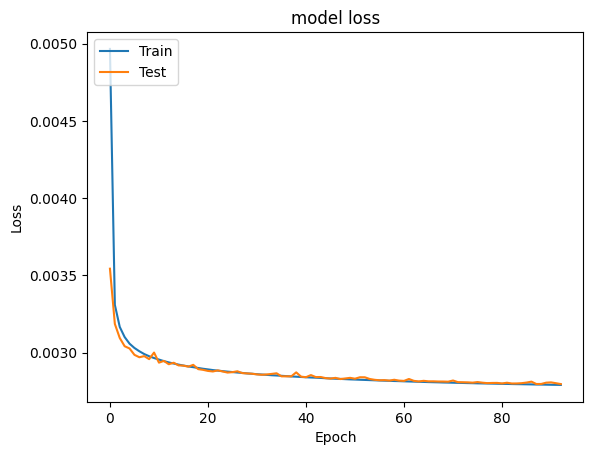

In [18]:
plot_his(history_3)

In [19]:
model_3.evaluate(X_test,Y_test)

6554/6554 [==============================] - 6s 914us/step - loss: 0.0028 - rmse: 0.0054 - r2: 0.9998 - mae: 0.0028 - mse: 2.8965e-05 - mape: 584.5919


[0.002797475317493081,
 0.005381959956139326,
 0.9997678399085999,
 0.002797475317493081,
 2.8965492674615234e-05,
 584.5919189453125]

In [20]:
Y_pred_3 = model_3.predict(X_test)

6554/6554 [==============================] - 4s 644us/step


In [21]:
model_3.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                128       
                                                                 
 dense_1 (Dense)             (None, 128)               4224      
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dense_3 (Dense)             (None, 32)                2080      
                                                                 
 dense_4 (Dense)             (None, 1)                 33        
                                                                 
Total params: 14,721
Trainable params: 14,721
Non-trainable params: 0
_________________________________________________________________


In [22]:
AIC_value(model_3,Y_pred_3,Y_test)

AIC:  29440.834


In [23]:
model_3.save('Saved_models/model_3_SOCesti.h5')

In [24]:
%%time
tf.random.set_seed(42)

model_4 = tf.keras.Sequential([tf.keras.layers.Dense(50,activation = 'relu'),
                               tf.keras.layers.Dense(50),
                               tf.keras.layers.Dense(50),
                               tf.keras.layers.Dense(100),
                               tf.keras.layers.Dense(50),
                               tf.keras.layers.Dense(20),
                               tf.keras.layers.Dense(1)])

model_4.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.legacy.Adam(learning_rate=0.001,decay=0.001),
                metrics=[tf.keras.metrics.RootMeanSquaredError(name='rmse'),
                         tfa.metrics.RSquare(name='r2'),'mae','mse','mape'])

history_4 = model_4.fit(X_train,Y_train, epochs= 100,batch_size=32,validation_data=(X_test,Y_test), callbacks = callback)

Epoch 1/100
26215/26215 [==============================] - 41s 2ms/step - loss: 0.0095 - rmse: 0.0183 - r2: 0.9973 - mae: 0.0095 - mse: 3.3635e-04 - mape: 18650.8750 - val_loss: 0.0057 - val_rmse: 0.0093 - val_r2: 0.9993 - val_mae: 0.0057 - val_mse: 8.7083e-05 - val_mape: 6805.9316
Epoch 2/100
26215/26215 [==============================] - 41s 2ms/step - loss: 0.0055 - rmse: 0.0091 - r2: 0.9993 - mae: 0.0055 - mse: 8.3085e-05 - mape: 8041.2998 - val_loss: 0.0051 - val_rmse: 0.0088 - val_r2: 0.9994 - val_mae: 0.0051 - val_mse: 7.6723e-05 - val_mape: 7232.2544
Epoch 3/100
26215/26215 [==============================] - 40s 2ms/step - loss: 0.0052 - rmse: 0.0088 - r2: 0.9994 - mae: 0.0052 - mse: 7.6776e-05 - mape: 4700.0605 - val_loss: 0.0054 - val_rmse: 0.0087 - val_r2: 0.9994 - val_mae: 0.0054 - val_mse: 7.5967e-05 - val_mape: 5406.6001
Epoch 4/100
26215/26215 [==============================] - 41s 2ms/step - loss: 0.0051 - rmse: 0.0086 - r2: 0.9994 - mae: 0.0051 - mse: 7.4384e-05 - mape

Epoch 30/100
26215/26215 [==============================] - 58s 2ms/step - loss: 0.0044 - rmse: 0.0078 - r2: 0.9995 - mae: 0.0044 - mse: 6.0533e-05 - mape: 2071.3523 - val_loss: 0.0044 - val_rmse: 0.0077 - val_r2: 0.9995 - val_mae: 0.0044 - val_mse: 5.9877e-05 - val_mape: 2098.7922
Epoch 31/100
26215/26215 [==============================] - 57s 2ms/step - loss: 0.0044 - rmse: 0.0078 - r2: 0.9995 - mae: 0.0044 - mse: 6.0271e-05 - mape: 2068.7002 - val_loss: 0.0044 - val_rmse: 0.0077 - val_r2: 0.9995 - val_mae: 0.0044 - val_mse: 5.9329e-05 - val_mape: 1515.5192
Epoch 32/100
26215/26215 [==============================] - 58s 2ms/step - loss: 0.0044 - rmse: 0.0077 - r2: 0.9995 - mae: 0.0044 - mse: 6.0033e-05 - mape: 2111.2393 - val_loss: 0.0043 - val_rmse: 0.0077 - val_r2: 0.9995 - val_mae: 0.0043 - val_mse: 5.9138e-05 - val_mape: 1821.8372
Epoch 33/100
26215/26215 [==============================] - 58s 2ms/step - loss: 0.0044 - rmse: 0.0077 - r2: 0.9995 - mae: 0.0044 - mse: 5.9769e-05 - m

Epoch 59/100
26215/26215 [==============================] - 43s 2ms/step - loss: 0.0042 - rmse: 0.0075 - r2: 0.9995 - mae: 0.0042 - mse: 5.6503e-05 - mape: 2577.6768 - val_loss: 0.0042 - val_rmse: 0.0075 - val_r2: 0.9996 - val_mae: 0.0042 - val_mse: 5.5961e-05 - val_mape: 2092.1792
Epoch 60/100
26215/26215 [==============================] - 42s 2ms/step - loss: 0.0042 - rmse: 0.0075 - r2: 0.9995 - mae: 0.0042 - mse: 5.6475e-05 - mape: 2595.8369 - val_loss: 0.0042 - val_rmse: 0.0075 - val_r2: 0.9996 - val_mae: 0.0042 - val_mse: 5.5907e-05 - val_mape: 2797.6313
Epoch 61/100
26215/26215 [==============================] - 42s 2ms/step - loss: 0.0042 - rmse: 0.0075 - r2: 0.9995 - mae: 0.0042 - mse: 5.6403e-05 - mape: 2612.3164 - val_loss: 0.0042 - val_rmse: 0.0075 - val_r2: 0.9996 - val_mae: 0.0042 - val_mse: 5.5658e-05 - val_mape: 2506.4277
Epoch 62/100
26215/26215 [==============================] - 41s 2ms/step - loss: 0.0042 - rmse: 0.0075 - r2: 0.9995 - mae: 0.0042 - mse: 5.6301e-05 - m

Epoch 88/100
26215/26215 [==============================] - 44s 2ms/step - loss: 0.0042 - rmse: 0.0074 - r2: 0.9996 - mae: 0.0042 - mse: 5.5396e-05 - mape: 2654.8574 - val_loss: 0.0042 - val_rmse: 0.0074 - val_r2: 0.9996 - val_mae: 0.0042 - val_mse: 5.4881e-05 - val_mape: 3155.1824
Epoch 89/100
26215/26215 [==============================] - 41s 2ms/step - loss: 0.0042 - rmse: 0.0074 - r2: 0.9996 - mae: 0.0042 - mse: 5.5363e-05 - mape: 2656.6096 - val_loss: 0.0042 - val_rmse: 0.0074 - val_r2: 0.9996 - val_mae: 0.0042 - val_mse: 5.4902e-05 - val_mape: 2701.6165
Epoch 90/100
26215/26215 [==============================] - 40s 2ms/step - loss: 0.0042 - rmse: 0.0074 - r2: 0.9996 - mae: 0.0042 - mse: 5.5332e-05 - mape: 2675.2454 - val_loss: 0.0042 - val_rmse: 0.0074 - val_r2: 0.9996 - val_mae: 0.0042 - val_mse: 5.4959e-05 - val_mape: 3209.4578
Epoch 91/100
26215/26215 [==============================] - 44s 2ms/step - loss: 0.0042 - rmse: 0.0074 - r2: 0.9996 - mae: 0.0042 - mse: 5.5300e-05 - m

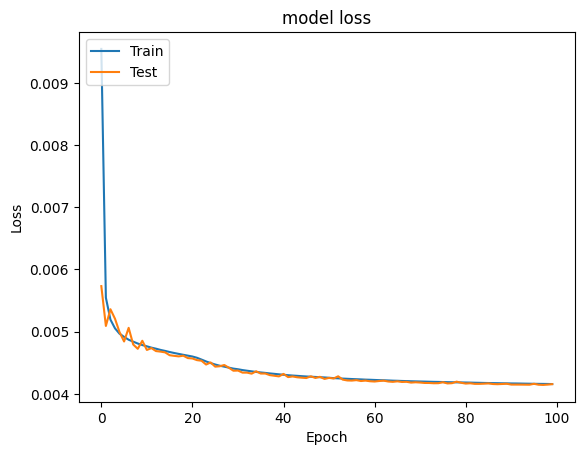

In [25]:
plot_his(history_4)

In [26]:
model_4.evaluate(X_test,Y_test)

6554/6554 [==============================] - 6s 941us/step - loss: 0.0042 - rmse: 0.0074 - r2: 0.9996 - mae: 0.0042 - mse: 5.4515e-05 - mape: 2485.4209


[0.0041570840403437614,
 0.007383457850664854,
 0.9995630979537964,
 0.0041570840403437614,
 5.451545075629838e-05,
 2485.4208984375]

In [27]:
Y_pred_4 = model_4.predict(X_test)

6554/6554 [==============================] - 5s 685us/step


In [28]:
model_4.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 50)                200       
                                                                 
 dense_6 (Dense)             (None, 50)                2550      
                                                                 
 dense_7 (Dense)             (None, 50)                2550      
                                                                 
 dense_8 (Dense)             (None, 100)               5100      
                                                                 
 dense_9 (Dense)             (None, 50)                5050      
                                                                 
 dense_10 (Dense)            (None, 20)                1020      
                                                                 
 dense_11 (Dense)            (None, 1)                

In [29]:
AIC_value(model_4,Y_pred_4,Y_test)

AIC:  32980.832


In [30]:
model_4.save('Saved_models/model_4_SOCesti.h5')

# LSTM

In [17]:
%%time
tf.random.set_seed(42)

model_5 = tf.keras.Sequential([tf.keras.layers.LSTM(50,activation= 'linear',return_sequences=True, input_shape=(3,1)),
                               tf.keras.layers.LSTM(10,activation='linear'),
                               tf.keras.layers.Dense(1)])

model_5.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.legacy.Adam(learning_rate=0.001,decay=0.0001),
                metrics=[tf.keras.metrics.RootMeanSquaredError(name='rmse'),
                         tfa.metrics.RSquare(name='r2'),'mae','mse','mape'])

history_5 = model_5.fit(X_train,Y_train,epochs=100,validation_data=(X_test,Y_test),callbacks = callback)

Epoch 1/100
26215/26215 [==============================] - 84s 3ms/step - loss: 0.0209 - rmse: 0.0507 - r2: 0.9794 - mae: 0.0209 - mse: 0.0026 - mape: 33095.7461 - val_loss: 0.0071 - val_rmse: 0.0119 - val_r2: 0.9989 - val_mae: 0.0071 - val_mse: 1.4067e-04 - val_mape: 1551.4481
Epoch 2/100
26215/26215 [==============================] - 87s 3ms/step - loss: 0.0064 - rmse: 0.0104 - r2: 0.9991 - mae: 0.0064 - mse: 1.0833e-04 - mape: 3296.3525 - val_loss: 0.0059 - val_rmse: 0.0100 - val_r2: 0.9992 - val_mae: 0.0059 - val_mse: 1.0052e-04 - val_mape: 2051.3748
Epoch 3/100
26215/26215 [==============================] - 91s 3ms/step - loss: 0.0059 - rmse: 0.0096 - r2: 0.9993 - mae: 0.0059 - mse: 9.2490e-05 - mape: 3574.5422 - val_loss: 0.0058 - val_rmse: 0.0095 - val_r2: 0.9993 - val_mae: 0.0058 - val_mse: 8.9609e-05 - val_mape: 4053.8020
Epoch 4/100
26215/26215 [==============================] - 96s 4ms/step - loss: 0.0056 - rmse: 0.0093 - r2: 0.9993 - mae: 0.0056 - mse: 8.6744e-05 - mape: 34

Epoch 30/100
26215/26215 [==============================] - 115s 4ms/step - loss: 0.0045 - rmse: 0.0081 - r2: 0.9995 - mae: 0.0045 - mse: 6.4985e-05 - mape: 2696.3267 - val_loss: 0.0045 - val_rmse: 0.0081 - val_r2: 0.9995 - val_mae: 0.0045 - val_mse: 6.5582e-05 - val_mape: 2852.4121
Epoch 31/100
26215/26215 [==============================] - 126s 5ms/step - loss: 0.0045 - rmse: 0.0080 - r2: 0.9995 - mae: 0.0045 - mse: 6.4545e-05 - mape: 2697.2988 - val_loss: 0.0046 - val_rmse: 0.0081 - val_r2: 0.9995 - val_mae: 0.0046 - val_mse: 6.6369e-05 - val_mape: 3375.4753
Epoch 32/100
26215/26215 [==============================] - 127s 5ms/step - loss: 0.0045 - rmse: 0.0080 - r2: 0.9995 - mae: 0.0045 - mse: 6.4081e-05 - mape: 2690.2661 - val_loss: 0.0045 - val_rmse: 0.0081 - val_r2: 0.9995 - val_mae: 0.0045 - val_mse: 6.5535e-05 - val_mape: 2935.6375
Epoch 33/100
26215/26215 [==============================] - 129s 5ms/step - loss: 0.0045 - rmse: 0.0080 - r2: 0.9995 - mae: 0.0045 - mse: 6.3735e-05

Epoch 59/100
26215/26215 [==============================] - 126s 5ms/step - loss: 0.0042 - rmse: 0.0076 - r2: 0.9995 - mae: 0.0042 - mse: 5.7238e-05 - mape: 1599.1794 - val_loss: 0.0043 - val_rmse: 0.0076 - val_r2: 0.9995 - val_mae: 0.0043 - val_mse: 5.8470e-05 - val_mape: 1408.9166
Epoch 60/100
26215/26215 [==============================] - 127s 5ms/step - loss: 0.0042 - rmse: 0.0076 - r2: 0.9995 - mae: 0.0042 - mse: 5.7107e-05 - mape: 1577.1721 - val_loss: 0.0042 - val_rmse: 0.0076 - val_r2: 0.9995 - val_mae: 0.0042 - val_mse: 5.7926e-05 - val_mape: 1295.9840
Epoch 61/100
26215/26215 [==============================] - 127s 5ms/step - loss: 0.0042 - rmse: 0.0075 - r2: 0.9995 - mae: 0.0042 - mse: 5.6954e-05 - mape: 1533.6039 - val_loss: 0.0042 - val_rmse: 0.0076 - val_r2: 0.9995 - val_mae: 0.0042 - val_mse: 5.7582e-05 - val_mape: 1533.0858
Epoch 62/100
26215/26215 [==============================] - 126s 5ms/step - loss: 0.0042 - rmse: 0.0075 - r2: 0.9995 - mae: 0.0042 - mse: 5.6714e-05

Epoch 88/100
26215/26215 [==============================] - 125s 5ms/step - loss: 0.0041 - rmse: 0.0073 - r2: 0.9996 - mae: 0.0041 - mse: 5.3758e-05 - mape: 1112.1825 - val_loss: 0.0041 - val_rmse: 0.0074 - val_r2: 0.9996 - val_mae: 0.0041 - val_mse: 5.4958e-05 - val_mape: 1070.1541
Epoch 89/100
26215/26215 [==============================] - 127s 5ms/step - loss: 0.0041 - rmse: 0.0073 - r2: 0.9996 - mae: 0.0041 - mse: 5.3699e-05 - mape: 1120.3845 - val_loss: 0.0041 - val_rmse: 0.0075 - val_r2: 0.9996 - val_mae: 0.0041 - val_mse: 5.5503e-05 - val_mape: 1085.3314
Epoch 90/100
26215/26215 [==============================] - 126s 5ms/step - loss: 0.0041 - rmse: 0.0073 - r2: 0.9996 - mae: 0.0041 - mse: 5.3688e-05 - mape: 1097.4570 - val_loss: 0.0041 - val_rmse: 0.0074 - val_r2: 0.9996 - val_mae: 0.0041 - val_mse: 5.4475e-05 - val_mape: 1127.0371
Epoch 91/100
26215/26215 [==============================] - 113s 4ms/step - loss: 0.0041 - rmse: 0.0073 - r2: 0.9996 - mae: 0.0041 - mse: 5.3624e-05

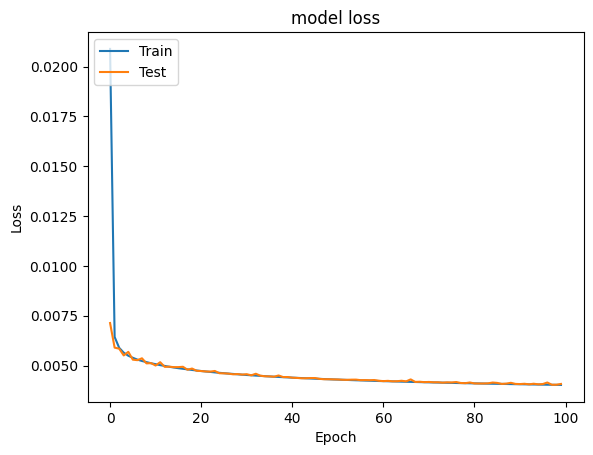

In [18]:
plot_his(history_5)

In [19]:
model_5.evaluate(X_test,Y_test)

6554/6554 [==============================] - 10s 2ms/step - loss: 0.0041 - rmse: 0.0073 - r2: 0.9996 - mae: 0.0041 - mse: 5.3881e-05 - mape: 987.9821


[0.004076512064784765,
 0.007340384181588888,
 0.999568521976471,
 0.004076512064784765,
 5.388123827287927e-05,
 987.9820556640625]

In [20]:
model_5.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 3, 50)             10400     
                                                                 
 lstm_1 (LSTM)               (None, 10)                2440      
                                                                 
 dense (Dense)               (None, 1)                 11        
                                                                 
Total params: 12,851
Trainable params: 12,851
Non-trainable params: 0
_________________________________________________________________


In [21]:
prediction_5 = model_5.predict(X_test)

6554/6554 [==============================] - 8s 1ms/step


In [22]:
AIC_value(model_5,prediction_5,Y_test)

AIC:  25700.836


In [23]:
model_5.save('Saved_models/model_5_SOCesti.h5')

In [17]:
tf.random.set_seed(42)

model_6 = tf.keras.Sequential([tf.keras.layers.LSTM(70,activation= 'linear',return_sequences=True, input_shape=(3,1)),
                               tf.keras.layers.LSTM(30,activation= 'linear'),
                               tf.keras.layers.Dense(20,activation='relu'),
                               tf.keras.layers.Dense(1,activation='linear')])

model_6.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.legacy.Adam(learning_rate=0.001,decay = 0.001),
                metrics=[tf.keras.metrics.RootMeanSquaredError(name='rmse'),
                         tfa.metrics.RSquare(name='r2'),'mae','mse','mape'])

history_6 = model_6.fit(X_train,Y_train,epochs=100,validation_data=(X_test,Y_test),callbacks = callback)

Epoch 1/100
26215/26215 [==============================] - 121s 5ms/step - loss: 0.0121 - rmse: 0.0424 - r2: 0.9856 - mae: 0.0121 - mse: 0.0018 - mape: 20861.1172 - val_loss: 0.0064 - val_rmse: 0.0103 - val_r2: 0.9991 - val_mae: 0.0064 - val_mse: 1.0608e-04 - val_mape: 4753.6294
Epoch 2/100
26215/26215 [==============================] - 120s 5ms/step - loss: 0.0061 - rmse: 0.0099 - r2: 0.9992 - mae: 0.0061 - mse: 9.8661e-05 - mape: 5917.4634 - val_loss: 0.0059 - val_rmse: 0.0097 - val_r2: 0.9993 - val_mae: 0.0059 - val_mse: 9.3207e-05 - val_mape: 5262.2959
Epoch 3/100
26215/26215 [==============================] - 100s 4ms/step - loss: 0.0058 - rmse: 0.0096 - r2: 0.9993 - mae: 0.0058 - mse: 9.1392e-05 - mape: 5704.4873 - val_loss: 0.0058 - val_rmse: 0.0096 - val_r2: 0.9993 - val_mae: 0.0058 - val_mse: 9.1895e-05 - val_mape: 5949.5068
Epoch 4/100
26215/26215 [==============================] - 101s 4ms/step - loss: 0.0057 - rmse: 0.0094 - r2: 0.9993 - mae: 0.0057 - mse: 8.8288e-05 - mape

Epoch 30/100
26215/26215 [==============================] - 99s 4ms/step - loss: 0.0050 - rmse: 0.0084 - r2: 0.9994 - mae: 0.0050 - mse: 7.1079e-05 - mape: 5372.1582 - val_loss: 0.0050 - val_rmse: 0.0085 - val_r2: 0.9994 - val_mae: 0.0050 - val_mse: 7.1651e-05 - val_mape: 5244.7461
Epoch 31/100
26215/26215 [==============================] - 100s 4ms/step - loss: 0.0050 - rmse: 0.0084 - r2: 0.9994 - mae: 0.0050 - mse: 7.0965e-05 - mape: 5360.0122 - val_loss: 0.0050 - val_rmse: 0.0085 - val_r2: 0.9994 - val_mae: 0.0050 - val_mse: 7.1680e-05 - val_mape: 5588.8823
Epoch 32/100
26215/26215 [==============================] - 99s 4ms/step - loss: 0.0050 - rmse: 0.0084 - r2: 0.9994 - mae: 0.0050 - mse: 7.0868e-05 - mape: 5337.0220 - val_loss: 0.0050 - val_rmse: 0.0085 - val_r2: 0.9994 - val_mae: 0.0050 - val_mse: 7.1491e-05 - val_mape: 4703.4546
Epoch 33/100
26215/26215 [==============================] - 104s 4ms/step - loss: 0.0050 - rmse: 0.0084 - r2: 0.9994 - mae: 0.0050 - mse: 7.0752e-05 -

Epoch 59/100
26215/26215 [==============================] - 99s 4ms/step - loss: 0.0049 - rmse: 0.0083 - r2: 0.9994 - mae: 0.0049 - mse: 6.9049e-05 - mape: 5198.1187 - val_loss: 0.0049 - val_rmse: 0.0083 - val_r2: 0.9994 - val_mae: 0.0049 - val_mse: 6.9705e-05 - val_mape: 4693.6802
Epoch 60/100
26215/26215 [==============================] - 100s 4ms/step - loss: 0.0049 - rmse: 0.0083 - r2: 0.9994 - mae: 0.0049 - mse: 6.9008e-05 - mape: 5199.1938 - val_loss: 0.0049 - val_rmse: 0.0084 - val_r2: 0.9994 - val_mae: 0.0049 - val_mse: 6.9899e-05 - val_mape: 5262.1606
Epoch 61/100
26215/26215 [==============================] - 99s 4ms/step - loss: 0.0049 - rmse: 0.0083 - r2: 0.9994 - mae: 0.0049 - mse: 6.8970e-05 - mape: 5186.1025 - val_loss: 0.0049 - val_rmse: 0.0083 - val_r2: 0.9994 - val_mae: 0.0049 - val_mse: 6.9582e-05 - val_mape: 5173.7334
Epoch 62/100
26215/26215 [==============================] - 99s 4ms/step - loss: 0.0049 - rmse: 0.0083 - r2: 0.9994 - mae: 0.0049 - mse: 6.8915e-05 - 

Epoch 88/100
26215/26215 [==============================] - 99s 4ms/step - loss: 0.0049 - rmse: 0.0083 - r2: 0.9995 - mae: 0.0049 - mse: 6.8080e-05 - mape: 5120.5083 - val_loss: 0.0049 - val_rmse: 0.0083 - val_r2: 0.9994 - val_mae: 0.0049 - val_mse: 6.8713e-05 - val_mape: 5048.5874
Epoch 89/100
26215/26215 [==============================] - 99s 4ms/step - loss: 0.0049 - rmse: 0.0082 - r2: 0.9995 - mae: 0.0049 - mse: 6.8052e-05 - mape: 5126.2354 - val_loss: 0.0049 - val_rmse: 0.0083 - val_r2: 0.9994 - val_mae: 0.0049 - val_mse: 6.8870e-05 - val_mape: 4965.4761
Epoch 90/100
26215/26215 [==============================] - 99s 4ms/step - loss: 0.0049 - rmse: 0.0082 - r2: 0.9995 - mae: 0.0049 - mse: 6.8047e-05 - mape: 5125.5127 - val_loss: 0.0049 - val_rmse: 0.0083 - val_r2: 0.9994 - val_mae: 0.0049 - val_mse: 6.8772e-05 - val_mape: 5030.1904
Epoch 91/100
26215/26215 [==============================] - 99s 4ms/step - loss: 0.0049 - rmse: 0.0082 - r2: 0.9995 - mae: 0.0049 - mse: 6.8016e-05 - m

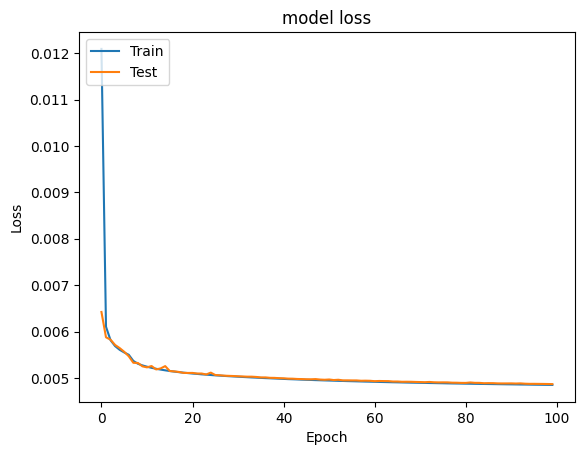

In [18]:
plot_his(history_6)

In [19]:
model_6.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 3, 70)             20160     
                                                                 
 lstm_1 (LSTM)               (None, 30)                12120     
                                                                 
 dense (Dense)               (None, 20)                620       
                                                                 
 dense_1 (Dense)             (None, 1)                 21        
                                                                 
Total params: 32,921
Trainable params: 32,921
Non-trainable params: 0
_________________________________________________________________


In [20]:
model_6.evaluate(X_test,Y_test)

6554/6554 [==============================] - 11s 2ms/step - loss: 0.0049 - rmse: 0.0083 - r2: 0.9995 - mae: 0.0049 - mse: 6.8579e-05 - mape: 5039.5532


[0.004867010749876499,
 0.008281255140900612,
 0.9994504451751709,
 0.004867010749876499,
 6.857918197056279e-05,
 5039.55322265625]

In [21]:
prediction_6 = model_6.predict(X_test)

6554/6554 [==============================] - 9s 1ms/step


In [22]:
AIC_value(model_6,prediction_6,Y_test)

AIC:  65840.836


In [23]:
model_6.save('Saved_models/model_6_SOCesti.h5')

In [17]:
tf.random.set_seed(42)

model_7 = tf.keras.Sequential([tf.keras.layers.LSTM(20,activation= 'relu',return_sequences=True, input_shape=(3,1)),
                               tf.keras.layers.LSTM(10,activation='linear'),
                               tf.keras.layers.Dense(10),
                               tf.keras.layers.Dense(1)])

model_7.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.legacy.Adam(learning_rate=0.001,decay=0.01),
                metrics=[tf.keras.metrics.RootMeanSquaredError(name='rmse'),
                         tfa.metrics.RSquare(name='r2'),'mae','mse','mape'])

history_7 = model_7.fit(X_train,Y_train,batch_size = 32,epochs=100,validation_data=(X_test,Y_test),callbacks = callback)

Epoch 1/100
26215/26215 [==============================] - 80s 3ms/step - loss: 0.2657 - rmse: 0.3113 - r2: 0.2237 - mae: 0.2657 - mse: 0.0969 - mape: 764166.3750 - val_loss: 0.2608 - val_rmse: 0.3052 - val_r2: 0.2530 - val_mae: 0.2608 - val_mse: 0.0932 - val_mape: 776141.6250
Epoch 2/100
26215/26215 [==============================] - 83s 3ms/step - loss: 0.2584 - rmse: 0.3024 - r2: 0.2672 - mae: 0.2584 - mse: 0.0915 - mape: 695972.5000 - val_loss: 0.2555 - val_rmse: 0.2992 - val_r2: 0.2819 - val_mae: 0.2555 - val_mse: 0.0895 - val_mape: 743357.4375
Epoch 3/100
26215/26215 [==============================] - 86s 3ms/step - loss: 0.2534 - rmse: 0.2968 - r2: 0.2945 - mae: 0.2534 - mse: 0.0881 - mape: 667673.7500 - val_loss: 0.2508 - val_rmse: 0.2936 - val_r2: 0.3086 - val_mae: 0.2508 - val_mse: 0.0862 - val_mape: 715181.6250
Epoch 4/100
26215/26215 [==============================] - 85s 3ms/step - loss: 0.2487 - rmse: 0.2914 - r2: 0.3195 - mae: 0.2487 - mse: 0.0849 - mape: 644676.0625 - v

26215/26215 [==============================] - 115s 4ms/step - loss: 0.0559 - rmse: 0.0902 - r2: 0.9349 - mae: 0.0559 - mse: 0.0081 - mape: 16562.4062 - val_loss: 0.0559 - val_rmse: 0.0903 - val_r2: 0.9347 - val_mae: 0.0559 - val_mse: 0.0081 - val_mape: 18130.3418
Epoch 60/100
26215/26215 [==============================] - 111s 4ms/step - loss: 0.0557 - rmse: 0.0898 - r2: 0.9354 - mae: 0.0557 - mse: 0.0081 - mape: 16922.4121 - val_loss: 0.0558 - val_rmse: 0.0899 - val_r2: 0.9351 - val_mae: 0.0558 - val_mse: 0.0081 - val_mape: 18332.2988
Epoch 61/100
26215/26215 [==============================] - 118s 5ms/step - loss: 0.0555 - rmse: 0.0895 - r2: 0.9358 - mae: 0.0555 - mse: 0.0080 - mape: 16978.5664 - val_loss: 0.0556 - val_rmse: 0.0897 - val_r2: 0.9355 - val_mae: 0.0556 - val_mse: 0.0080 - val_mape: 18373.4297
Epoch 62/100
26215/26215 [==============================] - 118s 4ms/step - loss: 0.0554 - rmse: 0.0892 - r2: 0.9362 - mae: 0.0554 - mse: 0.0080 - mape: 17106.0234 - val_loss: 0.0

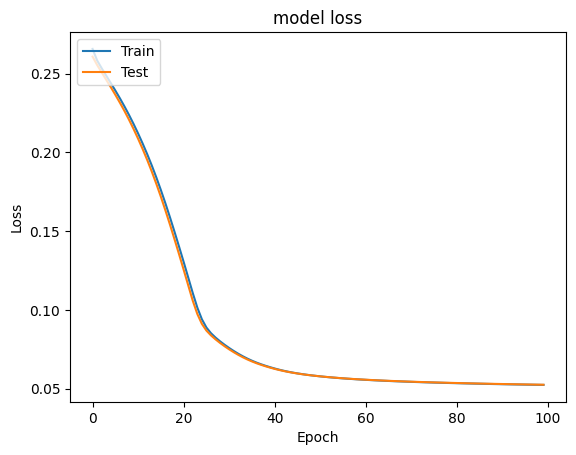

In [18]:
plot_his(history_7)

In [19]:
prediction_7 = model_7.predict(X_test)

6554/6554 [==============================] - 11s 2ms/step


In [20]:
model_7.evaluate(X_test,Y_test)

6554/6554 [==============================] - 18s 3ms/step - loss: 0.0524 - rmse: 0.0831 - r2: 0.9446 - mae: 0.0524 - mse: 0.0069 - mape: 18412.3008


[0.0524369440972805,
 0.08313482254743576,
 0.9445757269859314,
 0.0524369440972805,
 0.006911399308592081,
 18412.30078125]

In [21]:
AIC_value(model_7,prediction_7,Y_test)

AIC:  6240.8257


In [22]:
model_7.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 3, 20)             1760      
                                                                 
 lstm_1 (LSTM)               (None, 10)                1240      
                                                                 
 dense (Dense)               (None, 10)                110       
                                                                 
 dense_1 (Dense)             (None, 1)                 11        
                                                                 
Total params: 3,121
Trainable params: 3,121
Non-trainable params: 0
_________________________________________________________________


In [23]:
model_7.save('Saved_models/model_7_SOCesti.h5')

In [26]:
%%time
tf.random.set_seed(42)

model_8 = tf.keras.Sequential([tf.keras.layers.LSTM(8,activation= 'linear',return_sequences=True, input_shape=(3,1)),
                               tf.keras.layers.LSTM(16,activation= 'linear'),
                               tf.keras.layers.Dense(16,activation='linear'),
                               tf.keras.layers.Flatten(),
                               tf.keras.layers.Dense(1,activation='linear')])

model_8.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.legacy.Adam(learning_rate=0.001,decay = 0.001),
                metrics=[tf.keras.metrics.RootMeanSquaredError(name='rmse'),
                         tfa.metrics.RSquare(name='r2'),'mae','mse','mape'])

history_8 = model_8.fit(X_train,Y_train,batch_size=32,epochs=100,validation_data=(X_test,Y_test),,callbacks = callback)

Epoch 1/100
26215/26215 [==============================] - 134s 5ms/step - loss: 0.0382 - rmse: 0.0655 - r2: 0.9657 - mae: 0.0382 - mse: 0.0043 - mape: 43766.0820 - val_loss: 0.0334 - val_rmse: 0.0521 - val_r2: 0.9783 - val_mae: 0.0334 - val_mse: 0.0027 - val_mape: 37286.6602
Epoch 2/100
26215/26215 [==============================] - 130s 5ms/step - loss: 0.0334 - rmse: 0.0525 - r2: 0.9779 - mae: 0.0334 - mse: 0.0028 - mape: 27863.9453 - val_loss: 0.0335 - val_rmse: 0.0519 - val_r2: 0.9784 - val_mae: 0.0335 - val_mse: 0.0027 - val_mape: 37218.2773
Epoch 3/100
26215/26215 [==============================] - 134s 5ms/step - loss: 0.0332 - rmse: 0.0522 - r2: 0.9782 - mae: 0.0332 - mse: 0.0027 - mape: 29204.0527 - val_loss: 0.0330 - val_rmse: 0.0521 - val_r2: 0.9782 - val_mae: 0.0330 - val_mse: 0.0027 - val_mape: 29978.1055
Epoch 4/100
26215/26215 [==============================] - 133s 5ms/step - loss: 0.0330 - rmse: 0.0520 - r2: 0.9784 - mae: 0.0330 - mse: 0.0027 - mape: 30342.4121 - val_

26215/26215 [==============================] - 133s 5ms/step - loss: 0.0243 - rmse: 0.0377 - r2: 0.9886 - mae: 0.0243 - mse: 0.0014 - mape: 38109.6758 - val_loss: 0.0241 - val_rmse: 0.0374 - val_r2: 0.9888 - val_mae: 0.0241 - val_mse: 0.0014 - val_mape: 40180.1055
Epoch 60/100
26215/26215 [==============================] - 134s 5ms/step - loss: 0.0240 - rmse: 0.0371 - r2: 0.9890 - mae: 0.0240 - mse: 0.0014 - mape: 36647.0039 - val_loss: 0.0238 - val_rmse: 0.0366 - val_r2: 0.9892 - val_mae: 0.0238 - val_mse: 0.0013 - val_mape: 40652.5742
Epoch 61/100
26215/26215 [==============================] - 130s 5ms/step - loss: 0.0237 - rmse: 0.0365 - r2: 0.9893 - mae: 0.0237 - mse: 0.0013 - mape: 35435.2227 - val_loss: 0.0234 - val_rmse: 0.0362 - val_r2: 0.9895 - val_mae: 0.0234 - val_mse: 0.0013 - val_mape: 36162.5156
Epoch 62/100
26215/26215 [==============================] - 133s 5ms/step - loss: 0.0233 - rmse: 0.0359 - r2: 0.9897 - mae: 0.0233 - mse: 0.0013 - mape: 34659.7266 - val_loss: 0.0

Epoch 88/100
26215/26215 [==============================] - 132s 5ms/step - loss: 0.0180 - rmse: 0.0272 - r2: 0.9941 - mae: 0.0180 - mse: 7.4000e-04 - mape: 44790.3594 - val_loss: 0.0180 - val_rmse: 0.0273 - val_r2: 0.9940 - val_mae: 0.0180 - val_mse: 7.4442e-04 - val_mape: 46938.1992
Epoch 89/100
26215/26215 [==============================] - 132s 5ms/step - loss: 0.0179 - rmse: 0.0271 - r2: 0.9941 - mae: 0.0179 - mse: 7.3465e-04 - mape: 43302.0352 - val_loss: 0.0179 - val_rmse: 0.0272 - val_r2: 0.9941 - val_mae: 0.0179 - val_mse: 7.3907e-04 - val_mape: 45282.6016
Epoch 90/100
26215/26215 [==============================] - 134s 5ms/step - loss: 0.0178 - rmse: 0.0270 - r2: 0.9942 - mae: 0.0178 - mse: 7.2986e-04 - mape: 41282.2539 - val_loss: 0.0178 - val_rmse: 0.0271 - val_r2: 0.9941 - val_mae: 0.0178 - val_mse: 7.3495e-04 - val_mape: 43430.0039
Epoch 91/100
26215/26215 [==============================] - 134s 5ms/step - loss: 0.0177 - rmse: 0.0269 - r2: 0.9942 - mae: 0.0177 - mse: 7.25

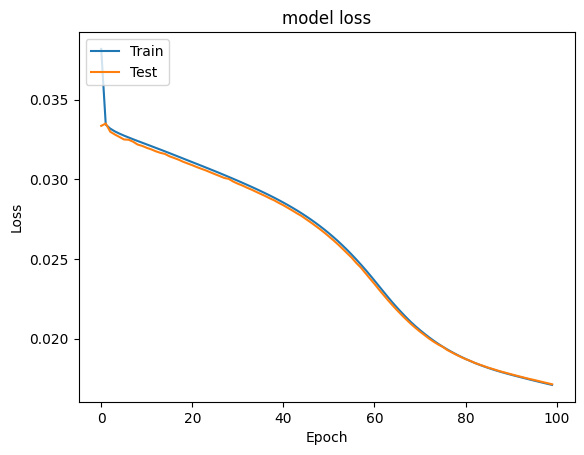

In [27]:
plot_his(history_8)

In [28]:
prediction_8 = model_8.predict(X_test)

6554/6554 [==============================] - 11s 2ms/step


In [29]:
model_8.evaluate(X_test,Y_test)

6554/6554 [==============================] - 19s 3ms/step - loss: 0.0171 - rmse: 0.0263 - r2: 0.9945 - mae: 0.0171 - mse: 6.9168e-04 - mape: 21754.0176


[0.01714031584560871,
 0.02629976160824299,
 0.9944532513618469,
 0.01714031584560871,
 0.0006916774436831474,
 21754.017578125]

In [30]:
AIC_value(model_8,prediction_8, Y_test)

AIC:  65840.836


In [31]:
model_8.save('Saved_models/model_8_SOCesti.h5')

# CNN

In [17]:
%%time
model_9 = tf.keras.Sequential([tf.keras.layers.Conv1D(10,2,activation='linear',input_shape=(3,1)),
                               tf.keras.layers.Conv1D(8,2,activation='relu'),
                               tf.keras.layers.Flatten(),
                               tf.keras.layers.Dense(1)])

model_9.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.legacy.Adam(learning_rate=0.001,decay=0.0001),
                metrics=[tf.keras.metrics.RootMeanSquaredError(name='rmse'),
                         tfa.metrics.RSquare(name='r2'),'mae','mse','mape'])

history_9 = model_9.fit(X_train,Y_train,epochs=100,validation_data=(X_test,Y_test),callbacks=callback)

Epoch 1/100
26215/26215 [==============================] - 96s 4ms/step - loss: 0.0325 - rmse: 0.0569 - r2: 0.9741 - mae: 0.0325 - mse: 0.0032 - mape: 49020.7305 - val_loss: 0.0305 - val_rmse: 0.0488 - val_r2: 0.9810 - val_mae: 0.0305 - val_mse: 0.0024 - val_mape: 44952.4453
Epoch 2/100
26215/26215 [==============================] - 98s 4ms/step - loss: 0.0305 - rmse: 0.0490 - r2: 0.9807 - mae: 0.0305 - mse: 0.0024 - mape: 42379.0000 - val_loss: 0.0304 - val_rmse: 0.0493 - val_r2: 0.9806 - val_mae: 0.0304 - val_mse: 0.0024 - val_mape: 47913.1133
Epoch 3/100
26215/26215 [==============================] - 102s 4ms/step - loss: 0.0304 - rmse: 0.0490 - r2: 0.9808 - mae: 0.0304 - mse: 0.0024 - mape: 41832.9531 - val_loss: 0.0304 - val_rmse: 0.0490 - val_r2: 0.9808 - val_mae: 0.0304 - val_mse: 0.0024 - val_mape: 45156.6641
Epoch 4/100
26215/26215 [==============================] - 67s 3ms/step - loss: 0.0304 - rmse: 0.0489 - r2: 0.9808 - mae: 0.0304 - mse: 0.0024 - mape: 41705.0586 - val_los

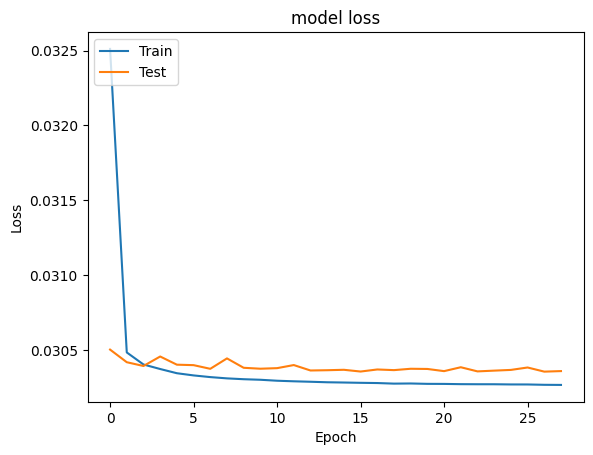

In [18]:
plot_his(history_9)

In [19]:
model_9.evaluate(X_test,Y_test)

6554/6554 [==============================] - 19s 3ms/step - loss: 0.0304 - rmse: 0.0489 - r2: 0.9809 - mae: 0.0304 - mse: 0.0024 - mape: 44181.9023


[0.03036024421453476,
 0.04888681694865227,
 0.980877697467804,
 0.03036024421453476,
 0.002389920875430107,
 44181.90234375]

In [20]:
prediction_9 = model_9.predict(X_test)

6554/6554 [==============================] - 7s 1ms/step


In [21]:
AIC_value(model_9,prediction_9,Y_test)

AIC:  412.82547


In [22]:
model_9.save('Saved_models/model_9_SOCesti.h5')

In [17]:
%%time
model_10 = tf.keras.Sequential([tf.keras.layers.Conv1D(10,2,activation='linear',input_shape=(3,1)),
                               tf.keras.layers.Conv1D(32,2,activation='linear'),
                               tf.keras.layers.Flatten(),
                               tf.keras.layers.Dense(10),
                               tf.keras.layers.Dense(1,activation='linear')])

model_10.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.legacy.Adam(learning_rate=0.01,decay=0.01),
                metrics=[tf.keras.metrics.RootMeanSquaredError(name='rmse'),'mae','mse','mape'])

history_10 = model_10.fit(X_train,Y_train,epochs=100,validation_data=(X_test,Y_test),callbacks = callback)

Epoch 1/100
26215/26215 [==============================] - 32s 1ms/step - loss: 0.0344 - rmse: 0.0540 - mae: 0.0344 - mse: 0.0029 - mape: 31858.1953 - val_loss: 0.0342 - val_rmse: 0.0523 - val_mae: 0.0342 - val_mse: 0.0027 - val_mape: 32217.7598
Epoch 2/100
26215/26215 [==============================] - 31s 1ms/step - loss: 0.0341 - rmse: 0.0528 - mae: 0.0341 - mse: 0.0028 - mape: 29742.9023 - val_loss: 0.0340 - val_rmse: 0.0529 - val_mae: 0.0340 - val_mse: 0.0028 - val_mape: 36046.1562
Epoch 3/100
26215/26215 [==============================] - 32s 1ms/step - loss: 0.0341 - rmse: 0.0528 - mae: 0.0341 - mse: 0.0028 - mape: 29760.6543 - val_loss: 0.0340 - val_rmse: 0.0527 - val_mae: 0.0340 - val_mse: 0.0028 - val_mape: 33225.0469
Epoch 4/100
26215/26215 [==============================] - 34s 1ms/step - loss: 0.0341 - rmse: 0.0528 - mae: 0.0341 - mse: 0.0028 - mape: 29752.3984 - val_loss: 0.0340 - val_rmse: 0.0528 - val_mae: 0.0340 - val_mse: 0.0028 - val_mape: 33952.3164
Epoch 5/100
2621

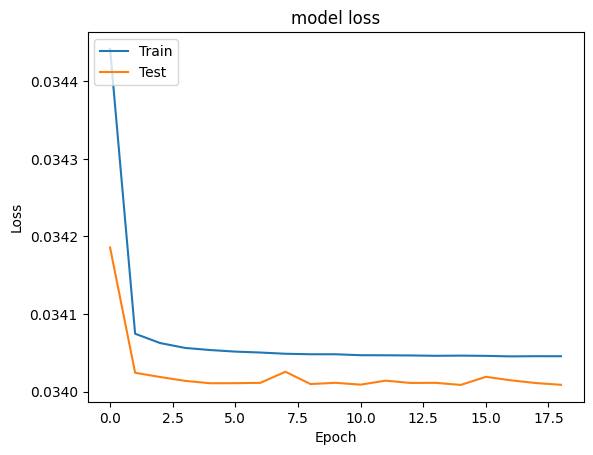

In [18]:
plot_his(history_10)

In [19]:
model_10.evaluate(X_test,Y_test)

6554/6554 [==============================] - 6s 949us/step - loss: 0.0340 - rmse: 0.0528 - mae: 0.0340 - mse: 0.0028 - mape: 33688.1289


[0.03400880843400955,
 0.05276403948664665,
 0.03400880843400955,
 0.0027840440161526203,
 33688.12890625]

In [20]:
prediction_10 = model_10.predict(X_test)

6554/6554 [==============================] - 5s 678us/step


In [21]:
AIC_value(model_10,prediction_10,Y_test)

AIC:  500.8219


In [22]:
model_10.save('Saved_models/model_10_SOCesti.h5')

In [17]:
%%time
model_11 = tf.keras.Sequential([tf.keras.layers.Conv1D(8,2,activation='relu',input_shape=(3,1)),
                               tf.keras.layers.Conv1D(4,2,activation='linear'),
                               tf.keras.layers.Flatten(),
                               tf.keras.layers.Dense(8,activation="linear"),
                               tf.keras.layers.Dense(4,activation="relu"),
                               tf.keras.layers.Dense(1,activation ='linear')])

model_11.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.legacy.Adam(learning_rate=0.001,decay=0.001),
                metrics=[tf.keras.metrics.RootMeanSquaredError(name='rmse'),'mae','mse','mape'])

history_11 = model_11.fit(X_train,Y_train,epochs=100,validation_data=(X_test,Y_test),callbacks = callback)

Epoch 1/100
26215/26215 [==============================] - 60s 2ms/step - loss: 0.0200 - rmse: 0.0393 - mae: 0.0200 - mse: 0.0015 - mape: 15675.9023 - val_loss: 0.0127 - val_rmse: 0.0209 - val_mae: 0.0127 - val_mse: 4.3821e-04 - val_mape: 8616.4463
Epoch 2/100
26215/26215 [==============================] - 60s 2ms/step - loss: 0.0104 - rmse: 0.0180 - mae: 0.0104 - mse: 3.2521e-04 - mape: 8945.5869 - val_loss: 0.0094 - val_rmse: 0.0166 - val_mae: 0.0094 - val_mse: 2.7603e-04 - val_mape: 8876.3887
Epoch 3/100
26215/26215 [==============================] - 56s 2ms/step - loss: 0.0092 - rmse: 0.0163 - mae: 0.0092 - mse: 2.6683e-04 - mape: 8305.3848 - val_loss: 0.0090 - val_rmse: 0.0161 - val_mae: 0.0090 - val_mse: 2.5932e-04 - val_mape: 8423.5264
Epoch 4/100
26215/26215 [==============================] - 55s 2ms/step - loss: 0.0090 - rmse: 0.0160 - mae: 0.0090 - mse: 2.5737e-04 - mape: 8085.1318 - val_loss: 0.0090 - val_rmse: 0.0160 - val_mae: 0.0090 - val_mse: 2.5480e-04 - val_mape: 8785.

26215/26215 [==============================] - 37s 1ms/step - loss: 0.0083 - rmse: 0.0153 - mae: 0.0083 - mse: 2.3360e-04 - mape: 10773.6201 - val_loss: 0.0083 - val_rmse: 0.0153 - val_mae: 0.0083 - val_mse: 2.3486e-04 - val_mape: 11309.7988
Epoch 34/100
26215/26215 [==============================] - 37s 1ms/step - loss: 0.0083 - rmse: 0.0153 - mae: 0.0083 - mse: 2.3344e-04 - mape: 10762.7441 - val_loss: 0.0083 - val_rmse: 0.0153 - val_mae: 0.0083 - val_mse: 2.3461e-04 - val_mape: 11294.3379
Epoch 35/100
26215/26215 [==============================] - 38s 1ms/step - loss: 0.0083 - rmse: 0.0153 - mae: 0.0083 - mse: 2.3334e-04 - mape: 10736.0879 - val_loss: 0.0083 - val_rmse: 0.0153 - val_mae: 0.0083 - val_mse: 2.3464e-04 - val_mape: 11354.0586
Epoch 36/100
26215/26215 [==============================] - 38s 1ms/step - loss: 0.0083 - rmse: 0.0153 - mae: 0.0083 - mse: 2.3324e-04 - mape: 10734.6309 - val_loss: 0.0083 - val_rmse: 0.0153 - val_mae: 0.0083 - val_mse: 2.3435e-04 - val_mape: 1134

26215/26215 [==============================] - 38s 1ms/step - loss: 0.0082 - rmse: 0.0152 - mae: 0.0082 - mse: 2.3181e-04 - mape: 11618.2959 - val_loss: 0.0083 - val_rmse: 0.0153 - val_mae: 0.0083 - val_mse: 2.3302e-04 - val_mape: 12315.9873
Epoch 66/100
26215/26215 [==============================] - 38s 1ms/step - loss: 0.0082 - rmse: 0.0152 - mae: 0.0082 - mse: 2.3192e-04 - mape: 11629.7861 - val_loss: 0.0082 - val_rmse: 0.0153 - val_mae: 0.0082 - val_mse: 2.3371e-04 - val_mape: 12325.2812
Epoch 67/100
26215/26215 [==============================] - 38s 1ms/step - loss: 0.0082 - rmse: 0.0153 - mae: 0.0082 - mse: 2.3259e-04 - mape: 11738.3291 - val_loss: 0.0083 - val_rmse: 0.0153 - val_mae: 0.0083 - val_mse: 2.3440e-04 - val_mape: 12364.0137
Epoch 68/100
26215/26215 [==============================] - 38s 1ms/step - loss: 0.0082 - rmse: 0.0153 - mae: 0.0082 - mse: 2.3277e-04 - mape: 11828.4229 - val_loss: 0.0082 - val_rmse: 0.0153 - val_mae: 0.0082 - val_mse: 2.3442e-04 - val_mape: 1260

26215/26215 [==============================] - 38s 1ms/step - loss: 0.0082 - rmse: 0.0152 - mae: 0.0082 - mse: 2.3242e-04 - mape: 11505.3926 - val_loss: 0.0082 - val_rmse: 0.0153 - val_mae: 0.0082 - val_mse: 2.3428e-04 - val_mape: 12143.3330
Epoch 98/100
26215/26215 [==============================] - 39s 1ms/step - loss: 0.0082 - rmse: 0.0152 - mae: 0.0082 - mse: 2.3249e-04 - mape: 11488.1846 - val_loss: 0.0082 - val_rmse: 0.0153 - val_mae: 0.0082 - val_mse: 2.3409e-04 - val_mape: 12046.7568
Epoch 99/100
26215/26215 [==============================] - 38s 1ms/step - loss: 0.0082 - rmse: 0.0152 - mae: 0.0082 - mse: 2.3243e-04 - mape: 11478.9375 - val_loss: 0.0082 - val_rmse: 0.0153 - val_mae: 0.0082 - val_mse: 2.3414e-04 - val_mape: 12023.0361
Epoch 100/100
26215/26215 [==============================] - 38s 1ms/step - loss: 0.0082 - rmse: 0.0152 - mae: 0.0082 - mse: 2.3239e-04 - mape: 11442.0225 - val_loss: 0.0082 - val_rmse: 0.0153 - val_mae: 0.0082 - val_mse: 2.3395e-04 - val_mape: 120

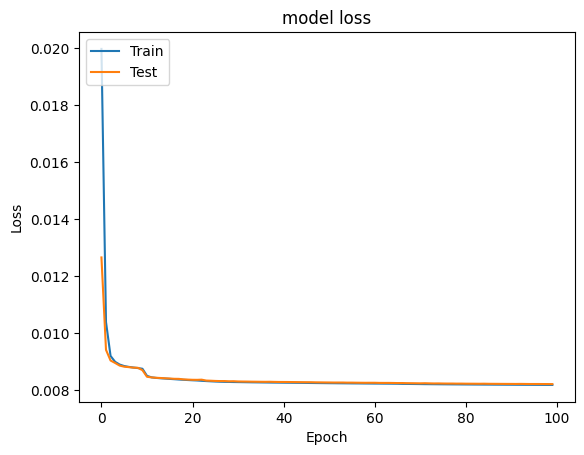

In [18]:
plot_his(history_11)

In [19]:
model_11.evaluate(X_test,Y_test)

6554/6554 [==============================] - 6s 901us/step - loss: 0.0082 - rmse: 0.0153 - mae: 0.0082 - mse: 2.3395e-04 - mape: 12003.9932


[0.008213073946535587,
 0.015295355580747128,
 0.008213073946535587,
 0.00023394789604935795,
 12003.9931640625]

In [20]:
prediction_11 = model_11.predict(X_test)

6554/6554 [==============================] - 5s 707us/step


In [21]:
AIC_value(model_11,prediction_11,Y_test)

AIC:  344.8341


In [22]:
model_11.save('Saved_models/model_11_SOCesti.h5')

In [29]:
%%time
model_12 = tf.keras.Sequential([tf.keras.layers.Conv1D(10,2,activation='relu',input_shape=(3,1)),
                               tf.keras.layers.Conv1D(32,2,activation='linear'),
                               tf.keras.layers.Flatten(),
                               tf.keras.layers.Dense(5),
                               tf.keras.layers.Dense(1,activation = 'linear')])

model_12.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.legacy.Adam(learning_rate=0.001,decay=0.0001),
                metrics=[tf.keras.metrics.RootMeanSquaredError(name='rmse'),'mae','mse','mape'])

history_12 = model_12.fit(X_train,Y_train,epochs=100,validation_data=(X_test,Y_test),callbacks = callback)

Epoch 1/100
26215/26215 [==============================] - 37s 1ms/step - loss: 0.0235 - rmse: 0.0399 - mae: 0.0235 - mse: 0.0016 - mape: 17974.0469 - val_loss: 0.0197 - val_rmse: 0.0299 - val_mae: 0.0197 - val_mse: 8.9547e-04 - val_mape: 10245.5361
Epoch 2/100
26215/26215 [==============================] - 36s 1ms/step - loss: 0.0195 - rmse: 0.0291 - mae: 0.0195 - mse: 8.4548e-04 - mape: 8687.1875 - val_loss: 0.0188 - val_rmse: 0.0282 - val_mae: 0.0188 - val_mse: 7.9435e-04 - val_mape: 10837.7217
Epoch 3/100
26215/26215 [==============================] - 36s 1ms/step - loss: 0.0189 - rmse: 0.0287 - mae: 0.0189 - mse: 8.2630e-04 - mape: 7414.8394 - val_loss: 0.0186 - val_rmse: 0.0287 - val_mae: 0.0186 - val_mse: 8.2243e-04 - val_mape: 4081.0771
Epoch 4/100
26215/26215 [==============================] - 37s 1ms/step - loss: 0.0188 - rmse: 0.0286 - mae: 0.0188 - mse: 8.1824e-04 - mape: 6023.5000 - val_loss: 0.0185 - val_rmse: 0.0284 - val_mae: 0.0185 - val_mse: 8.0435e-04 - val_mape: 373

26215/26215 [==============================] - 36s 1ms/step - loss: 0.0184 - rmse: 0.0283 - mae: 0.0184 - mse: 8.0175e-04 - mape: 3663.0730 - val_loss: 0.0184 - val_rmse: 0.0281 - val_mae: 0.0184 - val_mse: 7.9080e-04 - val_mape: 3151.4238
Epoch 34/100
26215/26215 [==============================] - 37s 1ms/step - loss: 0.0184 - rmse: 0.0283 - mae: 0.0184 - mse: 8.0037e-04 - mape: 3721.2737 - val_loss: 0.0184 - val_rmse: 0.0283 - val_mae: 0.0184 - val_mse: 8.0010e-04 - val_mape: 3406.9045
Epoch 35/100
26215/26215 [==============================] - 36s 1ms/step - loss: 0.0184 - rmse: 0.0283 - mae: 0.0184 - mse: 8.0124e-04 - mape: 3701.9324 - val_loss: 0.0184 - val_rmse: 0.0283 - val_mae: 0.0184 - val_mse: 8.0135e-04 - val_mape: 4400.5137
Epoch 36/100
26215/26215 [==============================] - 37s 1ms/step - loss: 0.0184 - rmse: 0.0283 - mae: 0.0184 - mse: 8.0111e-04 - mape: 3683.3223 - val_loss: 0.0184 - val_rmse: 0.0282 - val_mae: 0.0184 - val_mse: 7.9639e-04 - val_mape: 5758.9062
E

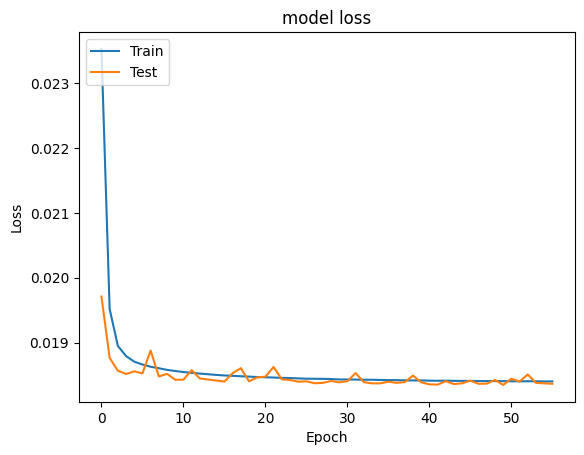

In [30]:
plot_his(history_12)

In [31]:
model_12.evaluate(X_test,Y_test)

6554/6554 [==============================] - 9s 1ms/step - loss: 0.0184 - rmse: 0.0281 - mae: 0.0184 - mse: 7.9009e-04 - mape: 4564.2412


[0.018362922593951225,
 0.02810857445001602,
 0.018362922593951225,
 0.0007900919881649315,
 4564.2412109375]

In [32]:
prediction_12 = model_12.predict(X_test)

6554/6554 [==============================] - 7s 1ms/step


In [33]:
AIC_value(model_11,prediction_11,Y_test)

AIC:  344.82822


In [34]:
model_12.save('Saved_models/model_12_SOCesti.h5')